# Pittsburgh Public Schools Enrollment by Neighborhood

In [53]:
import pandas as pd
import numpy

df = pd.read_csv('neighborhood_enrollment.csv')
df

,neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,student_count_redactions,attending_feeder,attending_nonfeeder,total_with_feeder_status,feeder_count_redactions,grade_level
0,Allegheny Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
1,Allegheny West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
2,Allentown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
3,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
4,Arlington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,West End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,9-12
356,West Oakland,13.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Y,NaN,NaN,14.0,Y,9-12
357,Westwood,NaN,NaN,17.0,NaN,NaN,NaN,34.0,62.0,Y,41.0,21.0,62.0,NaN,9-12
358,Wilkinsburg Borough,178.0,NaN,NaN,NaN,NaN,NaN,NaN,194.0,Y,NaN,NaN,194.0,Y,9-12


#### As can be seen above, there's a lot of uneccesary data, so we'll remove it;

In [54]:
dropCols = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14] #Columns to delete
df = df.drop(columns=df.columns[dropCols])
df #display new graph

,neighborhood,total_students_enrolled
0,Allegheny Center,NaN
1,Allegheny West,NaN
2,Allentown,NaN
3,Arlington,NaN
4,Arlington Heights,NaN
...,...,...
355,West End,NaN
356,West Oakland,14.0
357,Westwood,62.0
358,Wilkinsburg Borough,194.0


#### Now we are left with just the neighborhood, and students enrolled, but some of these entries are blank. This is most likely done to protect the children enrolled. To continue on, we'll only use data that is present, so we'll remove those entries

In [60]:
for index, row in df.iterrows(): #for each row of the dataframe
    if pd.isna(row[1]): #if the item at row index 1 (students enrolled) is NaN
        df = df.drop(index) #drop it
df #display frame

,neighborhood,total_students_enrolled
6,Bedford Dwellings,12.0
7,Beechview,44.0
9,Bloomfield,21.0
12,Brighton Heights,32.0
13,Brookline,57.0
...,...,...
354,Upper Lawrenceville,24.0
356,West Oakland,14.0
357,Westwood,62.0
358,Wilkinsburg Borough,194.0


#### As you can see, even after removing the NaN frames, we still have a very healthy dataset. Unfortunately, there is no way to automate removing non-pittsburgh neighborhoods from this set, BUT upon merging with my partner's sets, I can simply remove data for any neighborhood I have data for that they don't.

#### For now, here is my bar-graph of the data, sorted alphabetically;

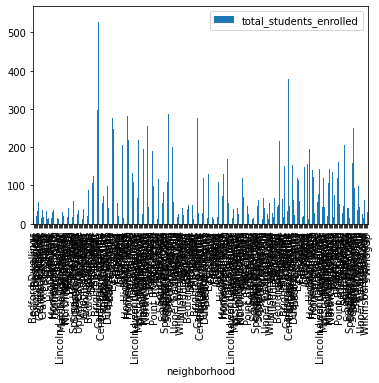

In [50]:
df.plot(x='neighborhood', y='total_students_enrolled', kind='bar')

#### And here it is sorted by largest number of enrolled students 

In [69]:
df = df.sort_values(by=['total_students_enrolled'], ascending=False)
df

,neighborhood,total_students_enrolled
107,Carrick,541.0
105,Brookline,526.0
286,Carrick,378.0
99,Beechview,339.0
284,Brookline,310.0
...,...,...
192,Bluff,11.0
213,Friendship,11.0
267,West Oakland,11.0
334,Polish Hill,11.0


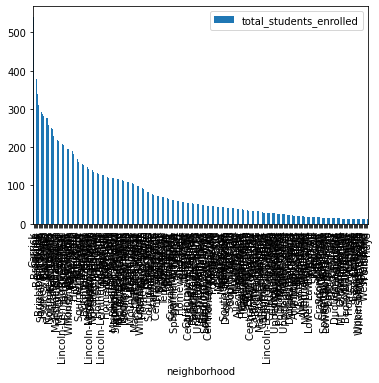

In [70]:
df.plot(x='neighborhood', y='total_students_enrolled', kind='bar')

#### As these kinda look like crap, here's a graph of the top 25 instead for now, just so you can see

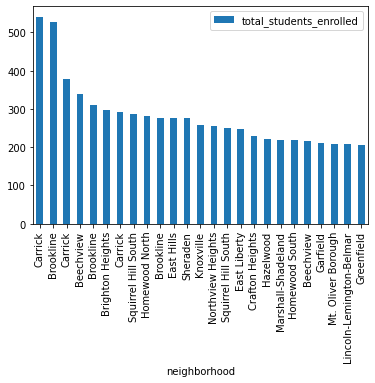

In [73]:
skimmedDf = df.head(25)
skimmedDf.plot(x='neighborhood', y='total_students_enrolled', kind='bar')

#### To conclude, it appears that the above neighborhoods have the best public school enrollment